In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv("wine_quality.csv")

In [87]:
df.columns

Index(['country', 'description', 'points', 'price', 'variety'], dtype='object')

In [88]:
df['point_price_ratio'] = df['points'] / df['price']

In [89]:
df.head()

,country,description,points,price,variety,point_price_ratio
0,US,This tremendous 100% varietal wine hails from ...,96,235.0,Cabernet Sauvignon,0.408511
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96,110.0,Tinta de Toro,0.872727
2,US,Mac Watson honors the memory of a wine once ma...,96,90.0,Sauvignon Blanc,1.066667
3,US,"This spent 20 months in 30% new French oak, an...",96,65.0,Pinot Noir,1.476923
4,France,"This is the top wine from La Bégude, named aft...",95,66.0,Provence red blend,1.439394


In [103]:
# Strong bias towards US wines in dataset
df.groupby('country').size()

country
France    14785
Italy     18784
Spain      8160
US        62139
dtype: int64

In [91]:
# Spain seems to have a higher point-to-price ratio
# France seems to have a higher standard deviation for price
# Mean of points and price do not see much variation across the board
df.groupby('country').agg(['mean', 'std'])

points                price            point_price_ratio          
              mean       std       mean        std              mean       std
country                                                                       
France   88.603314  3.142284  45.619885  69.697060          3.745917  2.326635
Italy    88.445006  2.754785  37.547913  37.067869          3.727403  2.191895
Spain    86.638725  3.128904  27.048529  33.861666          5.276559  2.798080
US       87.817200  3.410174  33.653808  24.891343          3.616423  2.051035

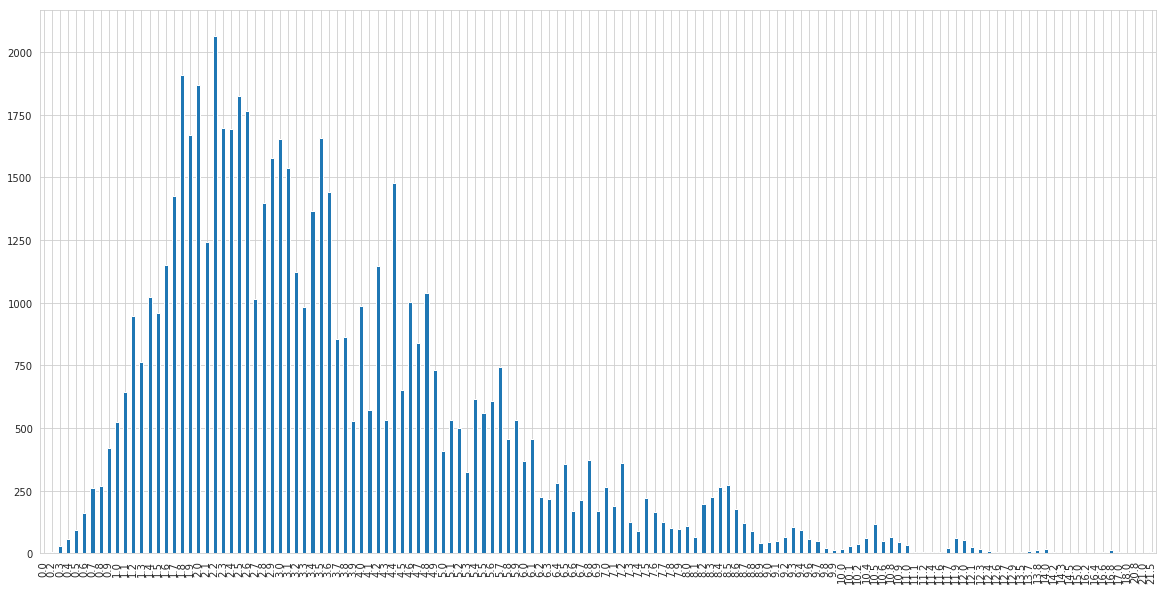

In [102]:
df[df.country=='US'].round(1).point_price_ratio.value_counts().sort_index().plot.bar(figsize=(20,10))

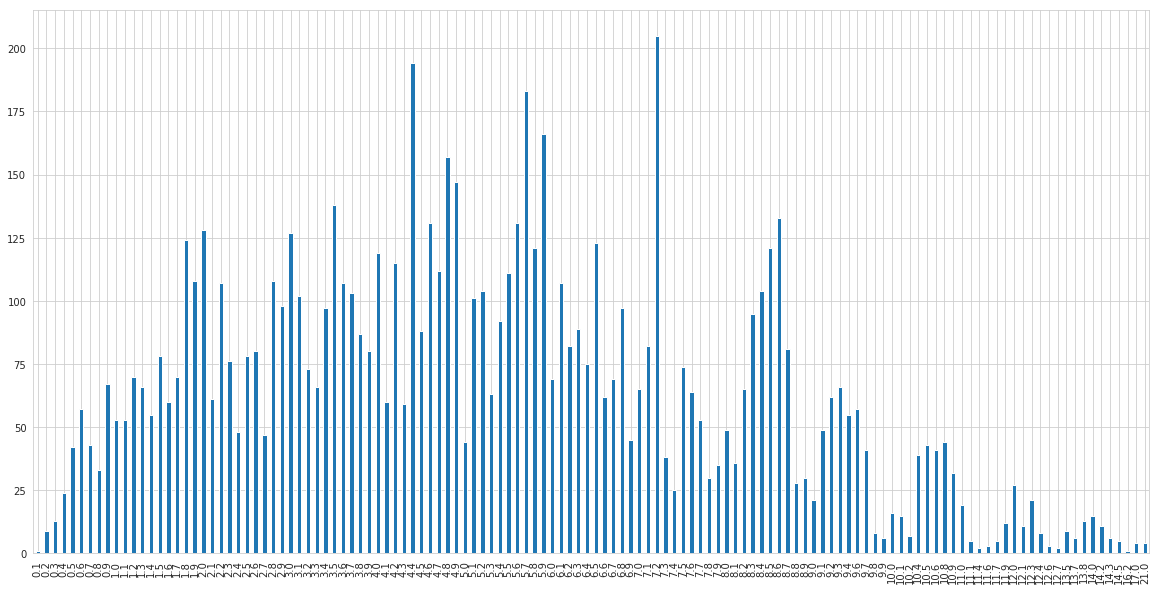

In [101]:
df[df.country=='Spain'].round(1).point_price_ratio.value_counts().sort_index().plot.bar(figsize=(20,10))

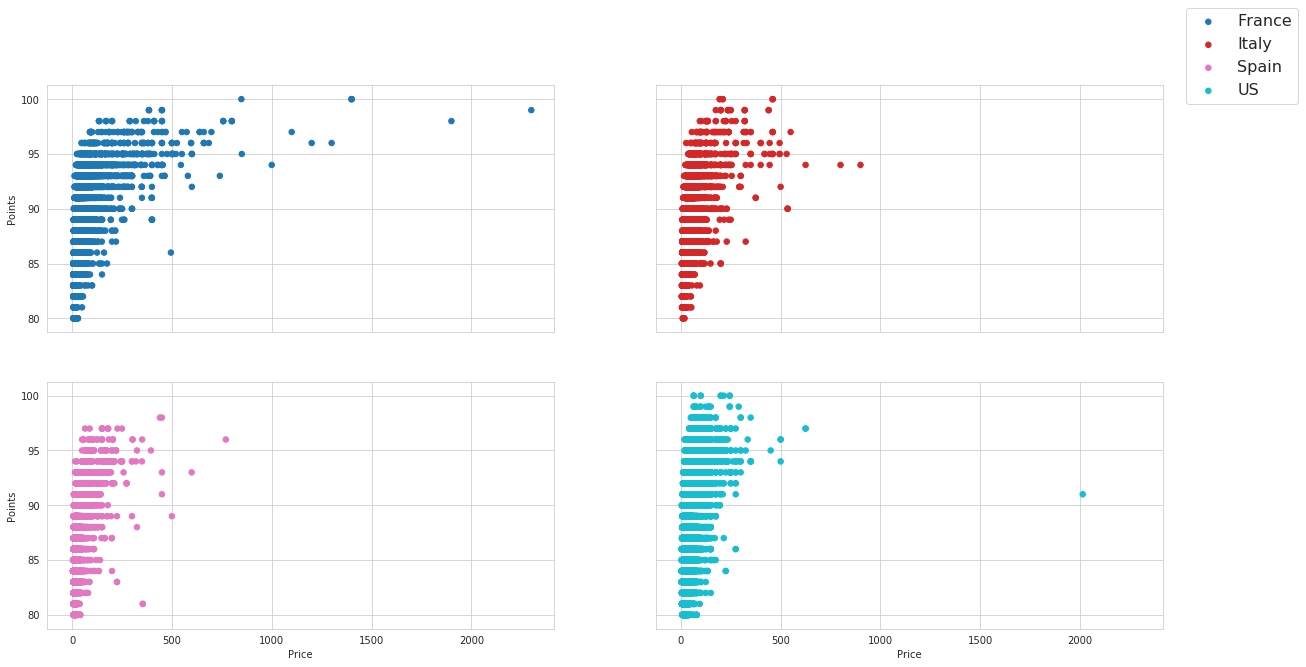

In [94]:
# Prepare Data 
# Create as many colors as there are unique df['country']
categories = np.unique(df['country'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
fig, axs = plt.subplots(2, 2, figsize=(20, 10), sharex=True, sharey=True)

for i in range(len(categories)):
    category = categories[i]
    ax = axs.flat[i]
    ax.scatter('price', 'points', 
                data=df[df.country==category], 
                s=30, label=str(category), c=[colors[i]]*(df[df.country==category].shape[0]))
    ax.set(xlabel='Price', ylabel='Points')
    ax.label_outer()

# Decorations
fig.legend(fontsize=16)    
fig.show() 

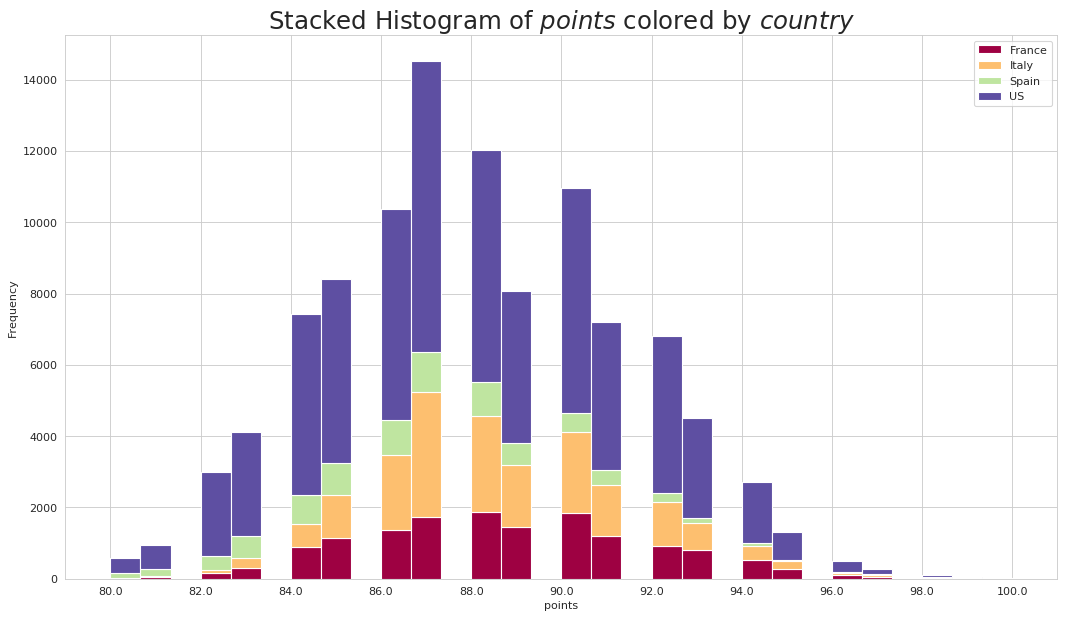

In [95]:
# Prepare data
x_var = 'points'
groupby_var = 'country'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
plt.show()